 ## Autoencoders, using TensorFlow

The MNIST dataset provided in python is a dataset of 70 000 images of handwritten digits (possible labels: from 0 to 9).The dataset is devided into training 60 000 examples with their labels and 10 000 test examples with their lables as well. 
Each example is an image represented by a matrix of size an array of 784 elements (this is the flattened version of the 28x28 image).


### Importing libraries and the dataset

In [45]:
import os
import numpy as np
import matplotlib as mpb
import matplotlib.pyplot as plt
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# to make the output of the notebook stable across runs
np.random.seed(42)

# resize the axis to get pretty figure
mpb.rc('axes', labelsize = 15)
mpb.rc('xtick', labelsize = 12)
mpb.rc('ytick', labelsize = 12)

# Import the MNIST dataset
from tensorflow.examples.tutorials.mnist import input_data
#mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
print(mnist.train.__class__)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
<class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>


If you have some difficulties you can check the link to the documentation provided. 


### Building the model 

We are going to define variables, placeholders...of the model 
as well as the architecture of the model before running it in a tensorflow session.


#### 1-Define X the input of our model 

https://www.tensorflow.org/versions/r1.12/api_docs/python/tf/placeholder

In [0]:
X = tf.placeholder(tf.float32, shape=[None, 784], name='X')

In this part we are going to define the different layers structure in the encoder and decoder part. We remind you that an the structure of autoencoder is symmetric. 
#### 2-Define the dimensions of the layers and the respective Weigths and biases of the model:####
https://www.tensorflow.org/versions/r1.12/api_docs/python/tf/Variable

In [0]:
input_dim = 784
lay1_dim = 256
lay2_dim = 64
lay3_dim = 256
output_dim = 784

# encoder weights
Weight_encoder = tf.Variable(tf.random_normal(shape=(input_dim, lay1_dim)))
Weight_encoder1 = tf.Variable(tf.random_normal(shape=(lay1_dim, lay2_dim)))

# decoder weights
Weight_decoder = tf.Variable(tf.random_normal(shape=(lay2_dim, lay3_dim)))
Weight_decoder1 = tf.Variable(tf.random_normal(shape=(lay3_dim, output_dim)))

# encoder biases 
bias_encoder = tf.Variable(tf.constant(value=0.0, shape=[lay1_dim]))
bias_encoder1 = tf.Variable(tf.constant(value=0.0, shape=[lay2_dim]))     

# decoder biases
bias_decoder = tf.Variable(tf.constant(value=0.0, shape=[lay3_dim]))         
bias_decoder1 = tf.Variable(tf.constant(value=0.0, shape=[output_dim]))


#### Hyperparameters
* Learning rate is a hyper-parameter that controls how much we are adjusting the weights of our network with respect the loss gradient.

* The batch size defines the number of samples that will be propagated through the network.

* An epoch is when an ENTIRE dataset is passed forwards and backwards through the neural network only ONCE.

You have to define the best hyperparameter that best optimize the model in other to reconstruct the image.
We look for a combination of hyperparameters which gives the best reocnstruction of the image in an acceptable execution time.
#### 3- Initialize the hyperparameters with some usual values.


In [0]:
Learning_Rate = 0.001
num_epoch = 50
Batch_Size = 128

Building an Encoder and Decoder

An autoencoder is composed of two part:
* An encoder that convert the input to an internal representation: h = f(x).
* Decoder: that convert the internal representation to the outputs.

#### 4- Using the weights  and biases defined before, define the functions encode and decode


In [0]:
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    global Weight_encoder
    global Weight_encoder1
    global bias_encoder
    global bias_encoder1
    layer_1 = tf.nn.sigmoid((tf.matmul(x, Weight_encoder) + bias_encoder), name='encoder_L1')
    layer_2 = tf.nn.sigmoid((tf.matmul(layer_1, Weight_encoder1) + bias_encoder1), name='encoder_L2')    
    
    return layer_2
    
def decoder(h):
    global Weight_decoder
    global Weight_decoder1
    global bias_decoder
    global bias_decoder1
    # Decoder Hidden layer with sigmoid activation #1
    layer_3 = tf.nn.sigmoid((tf.matmul(h, Weight_decoder) + bias_decoder), name='decoder_1')
    layer_4 = tf.nn.sigmoid((tf.matmul(layer_3, Weight_decoder1) + bias_decoder1), name='decoder_2')
    
    return layer_4

# Define model
Encoder = encoder(X)
Decoder = decoder(Encoder)

# prediction and target

X_pred, X_true = Decoder, X

# Loss
loss = tf.losses.mean_squared_error(X_true, X_pred)
optimizer = tf.train.AdamOptimizer(Learning_Rate).minimize(loss)

### Training the model 
The entire model already defined, we can now train it.

#### 5- Make the necessary changes and train the model. Afterwards, test it on the test dataset.


In [50]:
n_iter=mnist.train.images.shape[0]//Batch_Size
n_iter

429

In [51]:
mnist.test.images.shape

(10000, 784)

In [52]:
def evaluate_model(X_train, X_test, optimizer, loss, Decoder, Batch_Size, num_epoch, Learning_Rate, n_iter):
    init = tf.initialize_all_variables()

    with tf.Session() as sess:
        sess.run(init)
        print('Training...')
        for i in range(num_epoch):

          for j in range(n_iter):
            fdict = {X : X_train[j*Batch_Size:(j+1)*Batch_Size]}

            sess.run(optimizer, feed_dict=fdict)
          
          print('loss (train) epoch %d = %.2f ' % (i, sess.run(loss, feed_dict=fdict)))
          
        # generate decoded image with test data
        test_fd = {X : X_test}
        decoded_imgs = sess.run(Decoder, feed_dict=test_fd)
        print('loss (test) = ', sess.run(loss, feed_dict=test_fd))
    
    return decoded_imgs

decoded_imgs = evaluate_model(mnist.train.images, mnist.test.images, optimizer, loss, Decoder, Batch_Size, num_epoch, Learning_Rate, n_iter)

Training...
loss (train) epoch 0 = 0.11 
loss (train) epoch 1 = 0.11 
loss (train) epoch 2 = 0.10 
loss (train) epoch 3 = 0.10 
loss (train) epoch 4 = 0.09 
loss (train) epoch 5 = 0.09 
loss (train) epoch 6 = 0.09 
loss (train) epoch 7 = 0.08 
loss (train) epoch 8 = 0.08 
loss (train) epoch 9 = 0.08 
loss (train) epoch 10 = 0.07 
loss (train) epoch 11 = 0.07 
loss (train) epoch 12 = 0.07 
loss (train) epoch 13 = 0.07 
loss (train) epoch 14 = 0.06 
loss (train) epoch 15 = 0.06 
loss (train) epoch 16 = 0.06 
loss (train) epoch 17 = 0.06 
loss (train) epoch 18 = 0.06 
loss (train) epoch 19 = 0.06 
loss (train) epoch 20 = 0.06 
loss (train) epoch 21 = 0.06 
loss (train) epoch 22 = 0.05 
loss (train) epoch 23 = 0.05 
loss (train) epoch 24 = 0.05 
loss (train) epoch 25 = 0.05 
loss (train) epoch 26 = 0.05 
loss (train) epoch 27 = 0.05 
loss (train) epoch 28 = 0.05 
loss (train) epoch 29 = 0.05 
loss (train) epoch 30 = 0.05 
loss (train) epoch 31 = 0.05 
loss (train) epoch 32 = 0.05 
loss (tr


#### 6- Display the original and the reconstructed model for a few examples

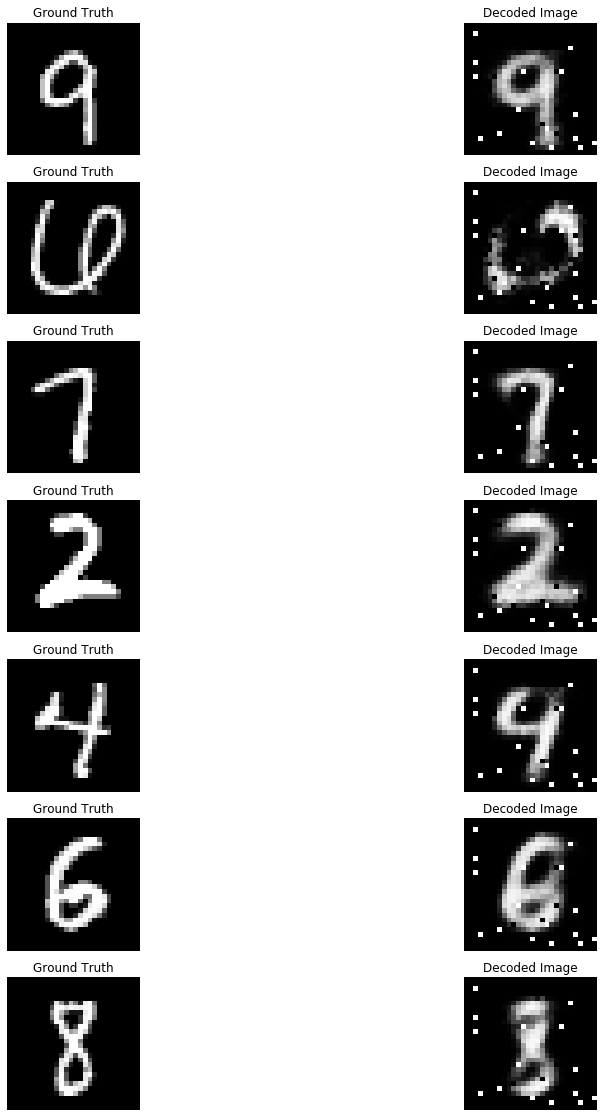

In [53]:
def plot_result(X_true, X_pred):
  fig, axes = plt.subplots(7, 2, figsize =(15,20))
  axes=axes.ravel()

  for i in range(1,14,2):  
      # Select a random number
      rnd = np.random.randint(X_true.shape[0], size=(1,1))

      # read and display an image with the selected index  
      true_digit=np.reshape(X_true[rnd,:], (28,28)) 
      decoded_digit=np.reshape(X_pred[rnd,:], (28,28))

      plt.subplot(7, 2, i, title='Ground Truth')
      plt.imshow(true_digit, cmap='gray')
      plt.axis('off')

      plt.subplot(7, 2, i+1, title='Decoded Image')
      plt.imshow(decoded_digit,cmap='gray')
      plt.axis('off')

plot_result(mnist.test.images, decoded_imgs)

#### 7-Change the hyperparameter, the number of layer in order to reach better reconstructed images and display the result. Comment!

In [0]:
# change the hyperparameters 

Learning_Rate2 = 0.001
num_epoch2 = 64
Batch_Size2 = 64
n_iter2=mnist.train.images.shape[0]//Batch_Size2

In [0]:
input_dim = 784
lay1_dim = 256
lay2_dim = 64
lay3_dim = 32
lay4_dim = 64
lay5_dim = 256
output_dim = 784

# encoder weights
Weight_encoder = tf.Variable(tf.random_normal(shape=(input_dim, lay1_dim)))
Weight_encoder1 = tf.Variable(tf.random_normal(shape=(lay1_dim, lay2_dim)))
Weight_encoder2 = tf.Variable(tf.random_normal(shape=(lay2_dim, lay3_dim)))

# decoder weights
Weight_decoder = tf.Variable(tf.random_normal(shape=(lay3_dim, lay4_dim)))
Weight_decoder1 = tf.Variable(tf.random_normal(shape=(lay4_dim, lay5_dim)))
Weight_decoder2 = tf.Variable(tf.random_normal(shape=(lay5_dim, output_dim)))

# encoder biases 
bias_encoder = tf.Variable(tf.constant(value=0.0, shape=[lay1_dim]))
bias_encoder1 = tf.Variable(tf.constant(value=0.0, shape=[lay2_dim]))
bias_encoder2 = tf.Variable(tf.constant(value=0.0, shape=[lay3_dim]))

# decoder biases
bias_decoder = tf.Variable(tf.constant(value=0.0, shape=[lay4_dim]))
bias_decoder1 = tf.Variable(tf.constant(value=0.0, shape=[lay5_dim]))
bias_decoder2 = tf.Variable(tf.constant(value=0.0, shape=[output_dim]))


In [0]:
def encoder2(x):
    # Encoder Hidden layer with sigmoid activation #1
    global Weight_encoder
    global Weight_encoder2
    global Weight_encoder1
    global bias_encoder
    global bias_encoder1
    global bias_encoder2
    layer_1 = tf.nn.sigmoid((tf.matmul(x, Weight_encoder) + bias_encoder))
    layer_2 = tf.nn.sigmoid((tf.matmul(layer_1, Weight_encoder1) + bias_encoder1))    
    layer_3 = tf.nn.sigmoid((tf.matmul(layer_2, Weight_encoder2) + bias_encoder2))    
    
    return layer_3
    
def decoder2(h):
    global Weight_decoder
    global Weight_decoder1
    global Weight_decoder2
    global bias_decoder
    global bias_decoder1
    global bias_decoder2
    # Decoder Hidden layer with sigmoid activation #1
    layer_3 = tf.nn.sigmoid((tf.matmul(h, Weight_decoder) + bias_decoder))
    layer_4 = tf.nn.sigmoid((tf.matmul(layer_3, Weight_decoder1) + bias_decoder1))
    layer_5 = tf.nn.sigmoid((tf.matmul(layer_4, Weight_decoder2) + bias_decoder2))
    
    return layer_5

# Define model
Encoder2 = encoder2(X)
Decoder2 = decoder2(Encoder2)

# prediction and target

X_pred2, X_true2 = Decoder2, X

# Loss
loss2 = tf.losses.mean_squared_error(X_true2, X_pred2)
optimizer2 = tf.train.AdamOptimizer(Learning_Rate2).minimize(loss2)

In [60]:
# train the model with the new hyperparameters
decoded_imgs2 = evaluate_model(mnist.train.images, mnist.test.images, optimizer2,
                               loss2, Decoder2, Batch_Size2, num_epoch2,
                               Learning_Rate2, n_iter2)

Training...
loss (train) epoch 0 = 0.11 
loss (train) epoch 1 = 0.08 
loss (train) epoch 2 = 0.08 
loss (train) epoch 3 = 0.07 
loss (train) epoch 4 = 0.06 
loss (train) epoch 5 = 0.06 
loss (train) epoch 6 = 0.06 
loss (train) epoch 7 = 0.05 
loss (train) epoch 8 = 0.05 
loss (train) epoch 9 = 0.05 
loss (train) epoch 10 = 0.05 
loss (train) epoch 11 = 0.05 
loss (train) epoch 12 = 0.05 
loss (train) epoch 13 = 0.05 
loss (train) epoch 14 = 0.05 
loss (train) epoch 15 = 0.05 
loss (train) epoch 16 = 0.05 
loss (train) epoch 17 = 0.05 
loss (train) epoch 18 = 0.05 
loss (train) epoch 19 = 0.04 
loss (train) epoch 20 = 0.04 
loss (train) epoch 21 = 0.04 
loss (train) epoch 22 = 0.04 
loss (train) epoch 23 = 0.04 
loss (train) epoch 24 = 0.04 
loss (train) epoch 25 = 0.04 
loss (train) epoch 26 = 0.04 
loss (train) epoch 27 = 0.04 
loss (train) epoch 28 = 0.04 
loss (train) epoch 29 = 0.04 
loss (train) epoch 30 = 0.04 
loss (train) epoch 31 = 0.04 
loss (train) epoch 32 = 0.04 
loss (tr

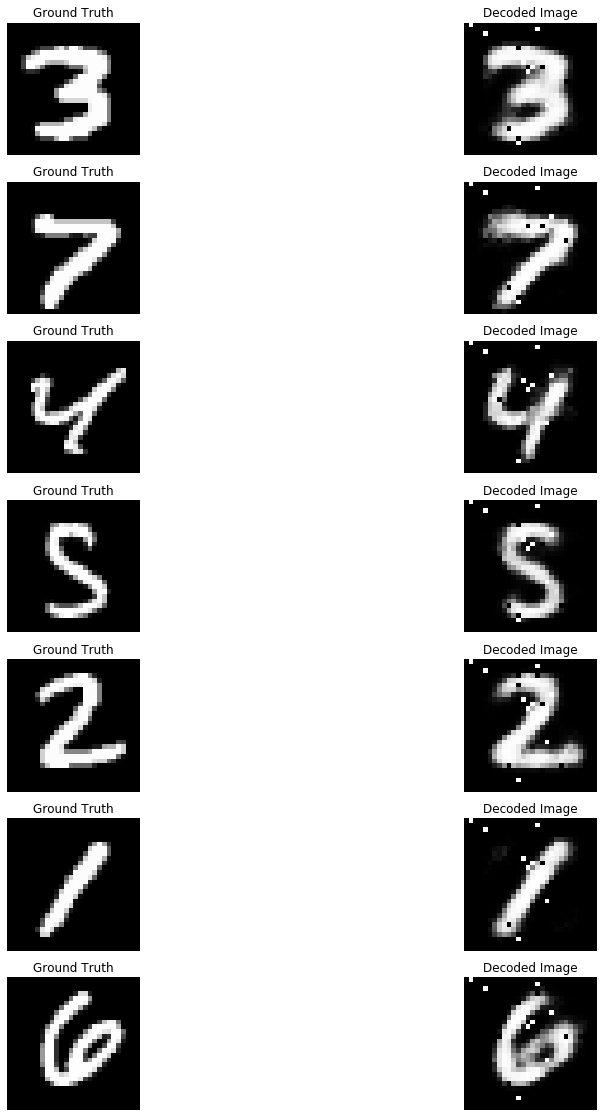

In [61]:
# display some images and the corresponding reconstructed ones
plot_result(mnist.test.images, decoded_imgs2)